In [92]:
#question 1 -> preprocessing data -> removing missing values and normalizing data using min-max normalization
#importing some required libraries libraries
import pandas as pd
from sklearn import preprocessing

#taking the input from data file
df = pd.read_csv('water-treatment.csv')
#setting up the column names to dataset as given in the description
df.columns = ["DATE","Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E","PH-P","DBO-P","SS-P","SSV-P","SED-P",
"COND-P","PH-D","DBO-D","DQO-D","SS-D","SSV-D","SED-D","COND-D","PH-S","DBO-S","DQO-S","SS-S","SSV-S","SED-S","COND-S","RD-DBO-P","RD-SS-P","RD-SED-P",
"RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G","RD-SS-G","RD-SED-G"]

#droping the date attribute out of the database
new_df =df.drop("DATE",1)

#filling missing values (NaN / ?) with the mean of that attribute 
#(explanation in english is given in the docoument) 

new_df.fillna(new_df.mean(),inplace=True)

# df.dropna(inplace=True)
# min_max_scaler = preprocessing.MinMaxScaler()
# new_df = min_max_scaler.fit_transform(new_df)

# normalizing the dataset using taking following formula. (Explanation in english given in the document)
new_df = (new_df - new_df.mean()) / (new_df.max() - new_df.min())

#let see the dataframe/dataset itself after applying the normalization and filling the missing values
print(new_df)


          Q-E      ZN-E      PH-E         DBO-E     DQO-E      SS-E     SSV-E  \
0    0.036197  0.019140 -0.061153  6.983221e-17  0.041979 -0.007100  0.108862   
1   -0.099619  0.079021 -0.116709  6.983221e-17  0.140816 -0.021760  0.118612   
2   -0.043774  0.034111  0.049958  4.001404e-02  0.210584 -0.018619  0.058723   
3   -0.005777 -0.025770  0.105513  1.309231e-01  0.103607 -0.026996  0.047581   
4    0.027162  0.019140 -0.005598  3.264303e-02 -0.040579 -0.021760  0.103291   
..        ...       ...       ...           ...       ...       ...       ...   
521 -0.089745 -0.065889 -0.061153 -2.351702e-01 -0.180114 -0.026996 -0.063840   
522 -0.073515 -0.061099 -0.005598  8.073008e-03 -0.070812 -0.029090  0.100506   
523 -0.085768 -0.061698 -0.227820 -1.221481e-01 -0.046393 -0.024902  0.042010   
524 -0.100398 -0.061698 -0.283376  2.772903e-02  0.160584  0.015936  0.051759   
525 -0.134417 -0.064392 -0.172264 -9.020709e-02 -0.124300 -0.050032  0.115826   

            SED-E    COND-E

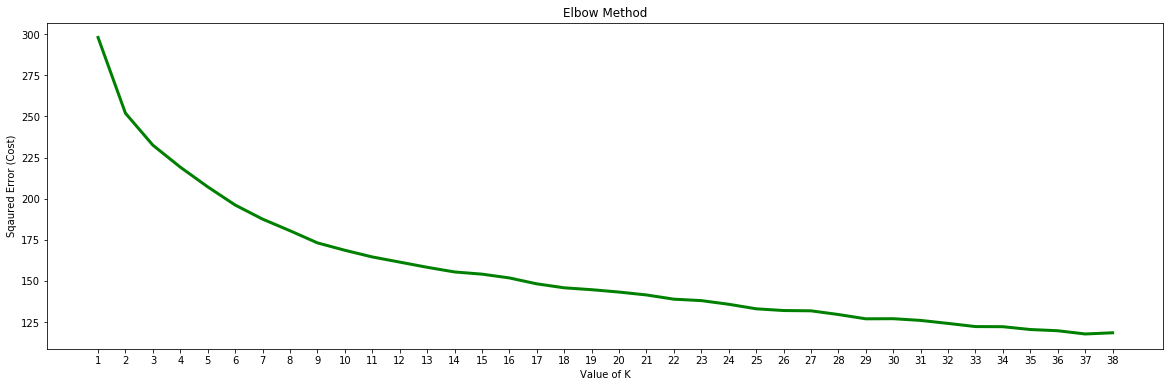

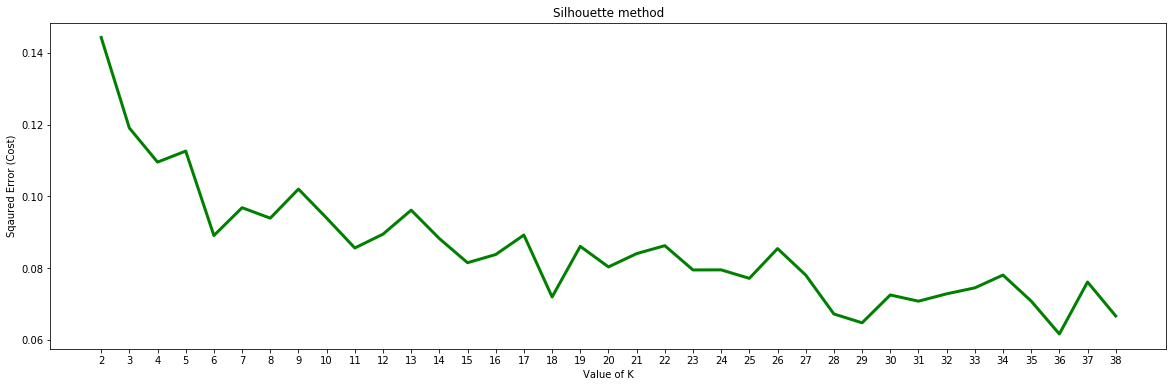

In [93]:
#question 2 -- finding value of K (no of clusters)
#importing required libraries 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt  
import numpy as np
#at first I have used elbow method to find the value of K for this dataset. 

def useElbowMethod(X):
    '''Defining the method for using elbow method'''
    cost =[] 
    #performing KMeans for all the possible values of n_cluster (1, 38)
    for i in range(1, 39): 
        KM = KMeans(n_clusters = i, max_iter = 500) 
        KM.fit(X) 
        # calculates squared error 
        # for the clustered points 
        cost.append(KM.inertia_)      

    # plot the cost (squared error) against K values 
    plt.figure(figsize=(20, 6))
    plt.xticks(np.arange(1,39,))
    plt.title("Elbow Method")
    plt.plot(range(1, 39), cost, color ='g', linewidth ='3') 
    plt.xlabel("Value of K") 
    plt.ylabel("Sqaured Error (Cost)") 
    plt.show() # clear the plot
    return cost

def useSilhoutteMethod(X):
    '''Defining the function for using silhoutte method. '''
    sil = []

    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in range(2, 39):
      kmeans = KMeans(n_clusters = k).fit(X)
      labels = kmeans.labels_
      sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    #now plotting the K value against the average silhoutte width
    plt.figure(figsize=(20, 6))
    plt.title("Silhouette method")
    plt.xticks(np.arange(2,39,1))
    plt.plot(range(2, 39), sil, color ='g', linewidth ='3') 
    plt.xlabel("Value of K") 
    plt.ylabel("Sqaured Error (Cost)") 
    plt.show()
    return
cost = useElbowMethod(new_df)
useSilhoutteMethod(new_df)

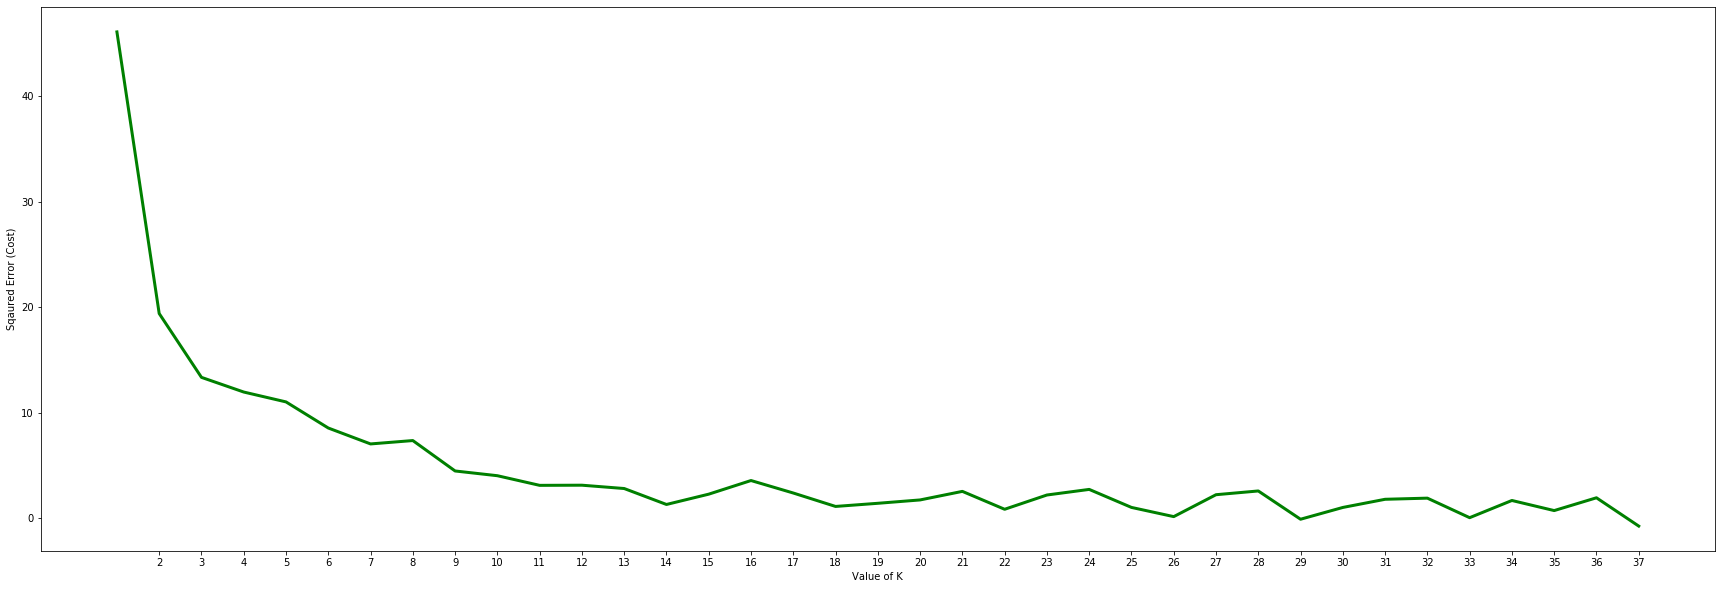

In [94]:
t = cost
x =[i-j for i, j in zip(t[:-1], t[1:])]
plt.figure(figsize=(30, 10))
plt.xticks(np.arange(2,38,1))
plt.plot(range(1, 38), x, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

In [95]:
#question 3 -> implementing modified k-means;
'''
Modified K means is nothing but using K-means with iterating value of K (no of clusters). 
This just means that just use the K means with elbow method where we tried for each possible 
value of K (1 to 38 (no of parameters)). 

    So here I am only using K means for value of K I got from elbow and silhoutte method. 

'''
import collections
from sklearn.cluster import KMeans
def applyKmeansAndSaveOutput(X, no_of_clusters, output_filename):
    ''' this function takes X(dataframe) for which K means to be performed, no of clusters and 
    output_filename to which file output to be saved. '''
    class_labels = []
    KM = KMeans(n_clusters = no_of_clusters, max_iter = 500) 
    KM.fit(X) 
    class_lables = KM.labels_
    # print(len(class_lables))
    # print(new_df.shape)

    #now saving the output the in the required format as asked by Professor

    z=collections.OrderedDict.fromkeys(class_lables)
    lables = [i for i in z.keys()]
    lables_dict = {}
    for i in lables:
        lables_dict[i] = lables.index(i)

    #now saving the output in the file 
    X['class_lable'] = class_lables
    dataToBeSaved = ""

    for index, row in X.iterrows():
        dataToBeSaved += str(index)+" "+str(int(lables_dict[row['class_lable']]))+"\n"
    # print(dataToBeSaved)   
    f = open(output_filename, "w")
    f.write(dataToBeSaved)
    f.close()
    print("Output saved in "+output_filename)
    return

applyKmeansAndSaveOutput(new_df,9, "kmeansOutput.txt")

Output saved in kmeansOutput.txt


Shape of df (526, 39)


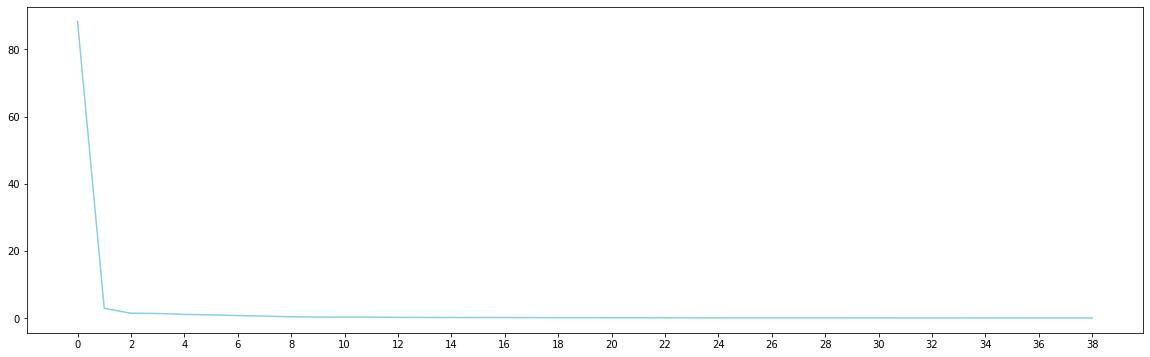

As we can see from the graph, we have to take  15 components for retaining the  98.8 % information


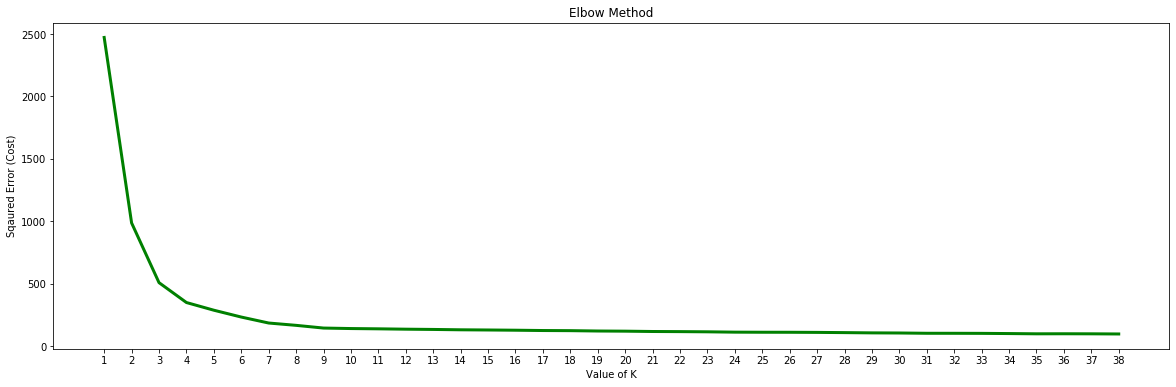

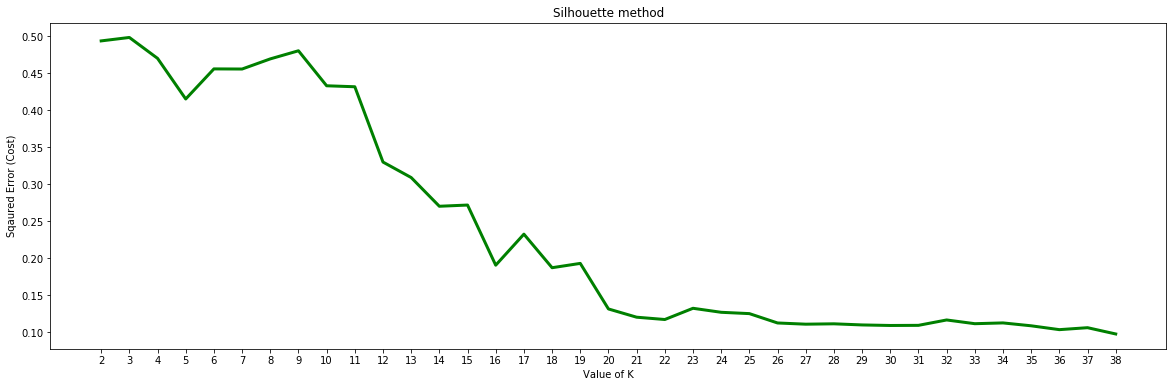

Output saved in kmeansAfterPcaOutput.txt


In [100]:
#question 4
#implementing PCA, using PCA to reduce dimenstionality and then implementing K means 
from sklearn.decomposition import PCA
def applyPCA(df,thershold1, colorForGraph, *args):
    '''
    this function takes a df(dataset), thershold(how much information is to be retain) and color of graph as a input
    '''

    '''Now defining the PCA'''
    print("Shape of df",df.shape)
    
    #taking optional parameter number of components
    pca = PCA()    
    pca.fit(df)

    '''Calculating the number of componenets given the thershold (required information retain)'''
    def CalCulateNumberOfComponent(eigen_values,thershold):
        sum_of_all_eigen_value = sum(eigen_values)
        for i in range(1, len(eigen_values)+1):
            if((sum(eigen_values[:i])/sum_of_all_eigen_value) >= thershold):
                return i


    # min_max_scaler = preprocessing.MinMaxScaler()
    # np_scaled = min_max_scaler.fit_transform(df1)
    # df_normalized = pd.DataFrame(np_scaled)

    '''
        plotting eigen valupca.components_ es for the dataset
    '''
    EigenValues = pca.explained_variance_
    plt.figure(figsize=(20, 6))
    plt.xticks(range(0,101,2))

    plt.plot(pca.explained_variance_ratio_*100, c=colorForGraph)
    plt.show()
    K = CalCulateNumberOfComponent(EigenValues,thershold1)
    print("As we can see from the graph, we have to take ", K, "components for retaining the ",thershold1*100,"% information")
    return K 
no_of_components_after_pca = applyPCA(new_df, 0.988, "skyblue")

#now implementing the pca with with whatever no of component we got to retain 95 information
pca = PCA(n_components=no_of_components_after_pca)    
pca.fit(new_df)
X_transform = pca.transform(new_df)          
#print(X_transform)
#converting nd-array object to dataframe
X = pd.DataFrame(X_transform)
#now using elbow and silhoutte method to determine K for this new components 
useElbowMethod(X)
useSilhoutteMethod(X)
applyKmeansAndSaveOutput(X,3,"kmeansAfterPcaOutput.txt")

In [87]:
#question 6, implementing autoencoder and comparing k means results with kmeans after pca
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard

X = new_df
Y = new_df

sX = minmax_scale(X, axis = 0)
ncol = sX.shape[1]
#setting 70 percent training size and 30 percent for testing 
X_train, X_test, Y_train, Y_test = train_test_split(sX, Y, train_size = 0.7, random_state = seed(2017))
 
input_dim = Input(shape = (ncol, ))
'''
I have tried implementing the autoencoder for different values of encoding_dim just to see for 
what minimum value of encoding_dim we can reconstruct the original features. 

Consequently, to check which method (PCA or autoencoder) retains more information with the fewer number of dimensions.   
But found out that the loss at end of 50th epoch doesn't vary much, it varies like from 0.0109 to 0.0128

You can un-comment the following loop try running it.
It takes much time, so I decided to remove the loop so that it will be easier for you to evaluate my work.   

Now going forward with taking the value of encoding_dim as 15 which is the same as no of the component after PCA and lets then compare two methods. 

Also, you can see the graph in Tensorboard by giving callback parameter in fit method, 
as you can see from the graph(posted in Explanation file), loss after 15 isn't decreasing 
much as we go on to increase the dimension. 
Therefore, encoding_dim of 15 is a good choice

'''
import tensorflow as tf
sess = tf.Session(); 

#for i in range(1,39):
encoding_dim = 15

#I am using the 4 layers for this autoencoder
#therefore, defining the four encoder layer
encoded1 = Dense(40, activation = 'relu')(input_dim)
encoded2 = Dense(30, activation = 'relu')(encoded1)
encoded3 = Dense(20, activation = 'relu')(encoded2)
encoded4 = Dense(encoding_dim, activation = 'relu')(encoded3)

#now defining the four decoder layers
decoded1 = Dense(20, activation = 'relu')(encoded4)
decoded2 = Dense(30, activation = 'relu')(decoded1)
decoded3 = Dense(40, activation = 'relu')(decoded2)
decoded4 = Dense(ncol, activation = 'sigmoid')(decoded3)

autoencoder = Model(inputs = [input_dim], output = decoded4)

#using mean_square_error method for loss function as data is non-MNIST and corresponding RMSprop() optimizer. 
autoencoder.compile(optimizer = RMSprop(), loss = 'mean_squared_error') 
autoencoder.fit(X_train, X_train, epochs = 50, batch_size = 100, shuffle = True, 
                validation_data = (X_test, X_test))

encoder = Model(inputs = [input_dim], output = encoded4)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_train)


/home/aditya/Desktop/venv2/env/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


Train on 368 samples, validate on 158 samples
Epoch 1/50
368/368 [==============================] - 7s 19ms/step - loss: 0.0950 - val_loss: 0.0925
Epoch 2/50
368/368 [==============================] - 0s 122us/step - loss: 0.0908 - val_loss: 0.0846
Epoch 3/50
368/368 [==============================] - 0s 125us/step - loss: 0.0800 - val_loss: 0.0694
Epoch 4/50
368/368 [==============================] - 0s 127us/step - loss: 0.0641 - val_loss: 0.0544
Epoch 5/50
368/368 [==============================] - 0s 138us/step - loss: 0.0505 - val_loss: 0.0439
Epoch 6/50
368/368 [==============================] - 0s 131us/step - loss: 0.0411 - val_loss: 0.0367
Epoch 7/50
368/368 [==============================] - 0s 131us/step - loss: 0.0345 - val_loss: 0.0310
Epoch 8/50
368/368 [==============================] - 0s 80us/step - loss: 0.0293 - val_loss: 0.0267
Epoch 9/50
368/368 [==============================] - 0s 77us/step - loss: 0.0255 - val_loss: 0.0237
Epoch 10/50
368/368 [==================

/home/aditya/Desktop/venv2/env/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


In [89]:
'''
As you can see from above output, at the end of the 50th epoch, the loss is 0.0123 
for reconstruction of the original dimenstions. 
which seems preety reasonable for output. 


Now to compare autoencoder with PCA, we can try buidling the  inverse transform and then calculate the mean square error for this . 
I have used to same X_train as input to pca to make fair comparision between these two method as these will have data rows/instances. 

'''

pca = PCA(n_components=15)    
pca.fit(new_df)
X_transform = pca.transform(X_train)          
X_projected = pca.inverse_transform(X_transform)
loss = ((X_train - X_projected) ** 2).mean()
print("The loss in PCA is ",loss)

'''
As you can see from the calculated loss, the loss in PCA(0.0636639950378039) is much higher than the loss in autoencoder. Therefore, 
autoencoder is a better dimensionality reduction method than PCA. 

'''

The loss in PCA is  0.0658550889407306


'\nAs you can see from the calculated loss, the loss in PCA(0.0636639950378039) is much higher than the loss in autoencoder. Therefore, \nautoencoder is a better dimensionality reduction method than PCA. \n\n'